# Exploratory Data Analysis
Based on demo from lecture 2.

In [1]:
# Install packages
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("PyPlot")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
# bring packages into main namespace
using DataFrames             # Data tables are called "DataFrames"
using StatsPlots             # load plotting packages 
using Statistics             # basic statistical functions
using CSV                    # tools for working with CSV files
# plotly() # good interactive html plotting tool
pyplot()   # good plotting tool for saving pdf figures

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


Plots.PyPlotBackend()

# Load data

In [61]:
acs = CSV.read("Consumer_Airfare_Report__Table_1a_-_All_U.S._Airport_Pair_Markets.csv") #, limit=10000) # read 10000 rows from the csv
head(acs)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1
,String,Int64,Int64,Int64,Int64,String
1,Table 1a,2010,1,34614,33195,"Salt Lake City, UT"
2,Table 1a,1998,4,30189,31703,"Colorado Springs, CO"
3,Table 1a,1998,4,30198,30852,"Pittsburgh, PA"
4,Table 1a,2009,3,32211,32575,"Las Vegas, NV"
5,Table 1a,1993,4,30255,30852,"Huntsville, AL"
6,Table 1a,2010,4,33198,32575,"Kansas City, MO"


In [78]:
acs[:when] = acs[:Year] .+ ((acs[:quarter] .-1) ./ 4)

213175-element Array{Float64,1}:
 2010.0
 1998.75
 1998.75
 2009.5
 1993.75
 2010.75
 2007.25
 2003.25
 2005.75
 2014.75
 2001.0
 1993.0
 1998.75
    ⋮
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75

# Summary statistics

In [52]:
println(size(acs))
println(typeof(acs))
println(names(acs));
showall(head(acs))

(213175, 24)
DataFrame
["tbl", "Year", "quarter", "citymarketid_1", "citymarketid_2", "city1", "city2", "airportid_1", "airportid_2", "airport_1", "airport_2", "nsmiles", "passengers", "fare", "carrier_lg", "large_ms", "fare_lg", "carrier_low", "lf_ms", "fare_low", "Geocoded_City1", "Geocoded_City2", "tbl1apk", "when"]
6×24 DataFrame
│ Row │ tbl      │ Year  │ quarter │ citymarketid_1 │ citymarketid_2 │
│     │ String   │ Int64 │ Int64   │ Int64          │ Int64          │
├─────┼──────────┼───────┼─────────┼────────────────┼────────────────┤
│ 1   │ Table 1a │ 2010  │ 1       │ 34614          │ 33195          │
│ 2   │ Table 1a │ 1998  │ 4       │ 30189          │ 31703          │
│ 3   │ Table 1a │ 1998  │ 4       │ 30198          │ 30852          │
│ 4   │ Table 1a │ 2009  │ 3       │ 32211          │ 32575          │
│ 5   │ Table 1a │ 1993  │ 4       │ 30255          │ 30852          │
│ 6   │ Table 1a │ 2010  │ 4       │ 33198          │ 32575          │

│ Row │ city1           

In [79]:
# Build Airport -> Airport_ID dict
airport_to_id = Dict()
for i = 1:size(acs,1)
    row = acs[i,:]
    if ! haskey(airport_to_id, row[:airport_1])
        airport_to_id[row[:airport_1]] = row[:airportid_1]
    end
    if ! haskey(airport_to_id, row[:airport_2])
        airport_to_id[row[:airport_2]] = row[:airportid_2]
    end
end
@show airport_to_id

airport_to_id = Dict{Any,Any}("MPB" => 13439,"ORH" => 13933,"MAF" => 13158,"DFW" => 11298,"SAN" => 14679,"IAD" => 12264,"FLL" => 11697,"MYR" => 13577,"LGA" => 12953,"FNL" => 11719,"FNT" => 11721,"SRQ" => 14986,"EVV" => 11612,"BLI" => 10666,"HPN" => 12197,"SBN" => 14696,"STS" => 15023,"SEA" => 14747,"LCK" => 12917,"JAC" => 12441,"MSY" => 13495,"ICT" => 12278,"ROC" => 14576,"CGX" => 10977,"TUS" => 15376,"PDX" => 14057,"BFI" => 10559,"MSP" => 13487,"PVD" => 14307,"MRY" => 13476,"LIT" => 12992,"MDW" => 13232,"PAE" => 14004,"SFO" => 14771,"SYR" => 15096,"CAE" => 10868,"SNA" => 14908,"MCO" => 13204,"AMA" => 10279,"AGS" => 10208,"USA" => 12544,"PIA" => 14108,"SAC" => 14672,"AIY" => 10227,"SFB" => 14761,"SJC" => 14831,"PVU" => 14314,"RDU" => 14492,"EFD" => 11495,"MVY" => 13541,"DCA" => 11278,"LBE" => 12898,"SGF" => 14783,"LBB" => 12896,"ORF" => 13931,"FCA" => 11648,"BZN" => 10849,"BDL" => 10529,"SBS" => 14699,"TSS" => 15346,"DET" => 11295,"HSV" => 12217,"SMF" => 14893,"FWA" => 11823,"RNO" => 1

Dict{Any,Any} with 208 entries:
  "MPB" => 13439
  "ORH" => 13933
  "MAF" => 13158
  "DFW" => 11298
  "SAN" => 14679
  "IAD" => 12264
  "FLL" => 11697
  "MYR" => 13577
  "LGA" => 12953
  "FNL" => 11719
  "FNT" => 11721
  "SRQ" => 14986
  "EVV" => 11612
  "BLI" => 10666
  "HPN" => 12197
  "SBN" => 14696
  "STS" => 15023
  "SEA" => 14747
  "LCK" => 12917
  "JAC" => 12441
  "MSY" => 13495
  "ICT" => 12278
  "ROC" => 14576
  "CGX" => 10977
  "TUS" => 15376
  ⋮     => ⋮

In [80]:
fare = acs[:fare]; # Overall average fare
println("Overall average fare (mean, median, std)")
println(mean(fare))
println(median(fare))
println(std(fare))

fare_low = acs[:fare_low]; # Average fare for the lowest carrier
fare_low = fare_low[.!ismissing.(fare_low)]
println("\nAverage fare for the lowest carrier (mean, median, std)")
println(mean(fare_low))
println(median(fare_low))
println(std(fare_low))

fare_lg = acs[:fare_lg]; # Average fare for the carrier with the largest market share
fare_lg = fare_lg[.!ismissing.(fare_lg)]
println("\nAverage fare for the carrier with the largest market share (mean, median, std)")
println(mean(fare_lg))
println(median(fare_lg))
println(std(fare_lg))

Overall average fare (mean, median, std)
217.73721998358158
208.42
82.63151628703632

Average fare for the lowest carrier (mean, median, std)
190.17554171431811
181.08
73.1644790936143

Average fare for the carrier with the largest market share (mean, median, std)
217.49975798146238
207.07
84.42671673655438


In [81]:
from_nyc_idxs = acs[:airport_1].== "JFK"
to_sm_idxs = acs[:airport_2].== "SMF"
trip_idxs = from_nyc_idxs .& to_sf_idxs

nyc_to_sm = acs[trip_idxs,:]

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1
,String,Int64,Int64,Int64,Int64,String
1,Table 1a,2004,3,31703,33192,"New York City, NY (Metropolitan Area)"
2,Table 1a,2001,2,31703,33192,"New York City, NY (Metropolitan Area)"
3,Table 1a,2008,2,31703,33192,"New York City, NY (Metropolitan Area)"
4,Table 1a,2010,3,31703,33192,"New York City, NY (Metropolitan Area)"
5,Table 1a,2012,1,31703,33192,"New York City, NY (Metropolitan Area)"
6,Table 1a,1996,3,31703,33192,"New York City, NY (Metropolitan Area)"
7,Table 1a,2004,2,31703,33192,"New York City, NY (Metropolitan Area)"
8,Table 1a,2008,3,31703,33192,"New York City, NY (Metropolitan Area)"
9,Table 1a,1999,3,31703,33192,"New York City, NY (Metropolitan Area)"


# Plotting

In [9]:
function plotdata(x,y; xlab="x", ylab="y", margin=.05)
    scatter(x,y, label="data", legend=:topleft)
    xlabel!(xlab)
    ylabel!(ylab)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
    xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
end

plotdata (generic function with 1 method)

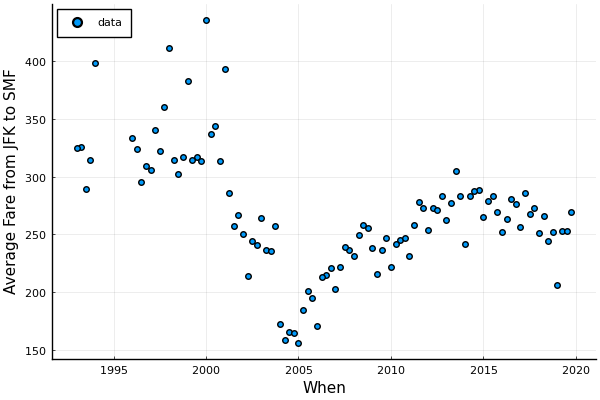

In [92]:
plotdata(nyc_to_sm[:when], nyc_to_sm[:fare], xlab="When", ylab="Average Fare from JFK to SMF")

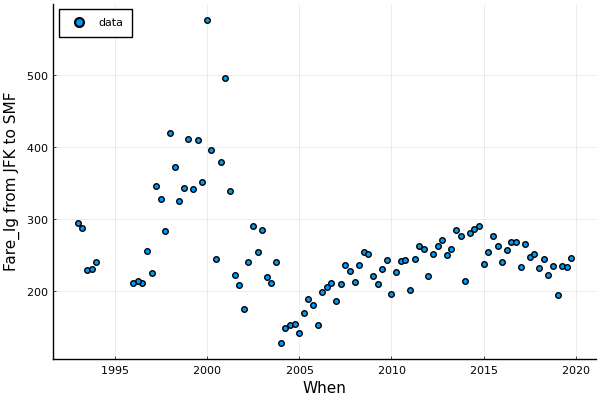

In [93]:
plotdata(nyc_to_sm[:when], nyc_to_sm[:fare_lg], xlab="When", ylab="Fare_lg from JFK to SMF")

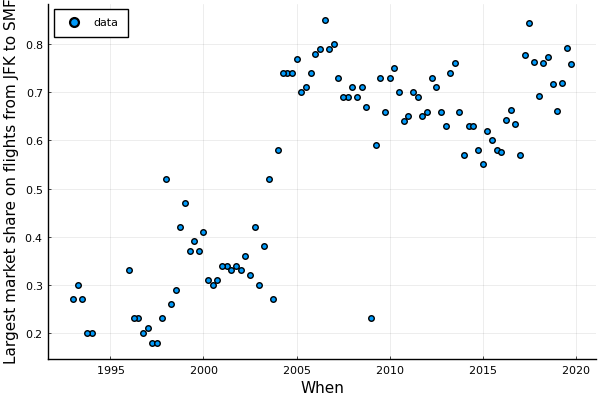

In [94]:
plotdata(nyc_to_sm[:when], nyc_to_sm[:large_ms], xlab="When", ylab="Largest market share on flights from JFK to SMF")

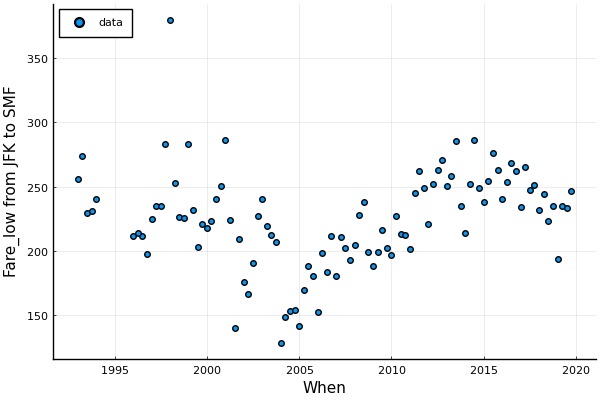

In [95]:
plotdata(nyc_to_sm[:when], nyc_to_sm[:fare_low], xlab="When", ylab="Fare_low from JFK to SMF")

# Modeling


In [37]:
# Split the data into train and test
test_frac = .2
n = size(acs,1)
n_te = Int(round(n*test_frac))
n_tr = n - n_te
idxs = rand(1:n,n)

train = acs[idxs[1:n_tr],:]
test = acs[idxs[n_tr+1:n],:]
@assert size(acs,1) == size(train,1) + size(test,1)

# Learn from the train set
function get_Xy(dataset)
    X = [dataset[:when] dataset[:airportid_1] dataset[:airportid_2] ones(size(dataset,1))]
    y = dataset[:fare]
    return X,y
end
X_tr, y_tr = get_Xy(train)
X_te, y_te = get_Xy(test)

w = X_tr \ y_tr

# Look at the MSE
train_error = sqrt(mean((y_tr - X_tr*w).^2))
@show train_error

test_error = sqrt(mean((y_te - X_te*w).^2))
@show test_error;

train_error = 81.97260987044933
test_error = 81.12789439674037


# Histograms


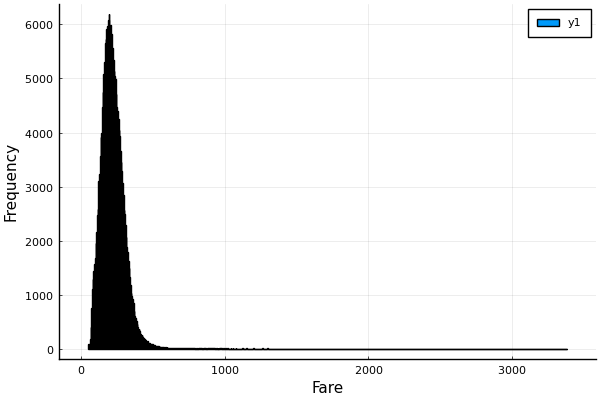

In [49]:
@df acs histogram(:fare)
xlabel!("Fare")
ylabel!("Frequency")

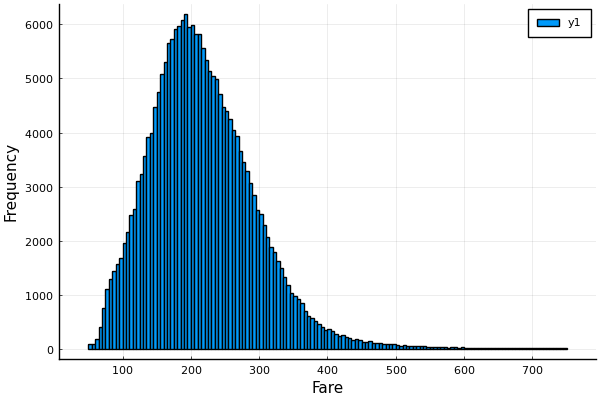

In [57]:
@df acs[ acs[:fare].<750,:  ] histogram(:fare)
xlabel!("Fare")
ylabel!("Frequency")

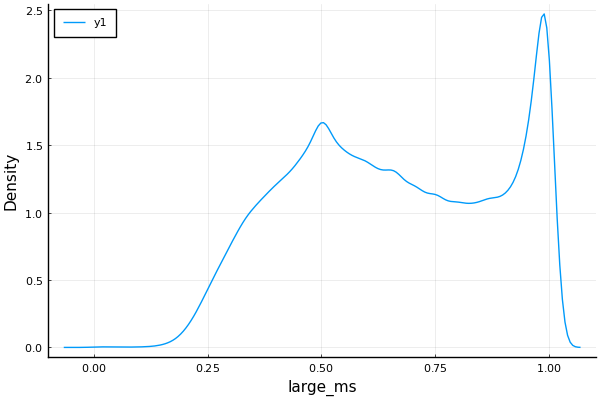

In [50]:
@df dropmissing(acs, :large_ms) density(:large_ms)
# histogram(acs[:large_ms], label="large_ms")
xlabel!("large_ms")
ylabel!("Density")

In [47]:
large_ms = acs[:large_ms] # Overall average fare
large_ms = large_ms[.!ismissing.(large_ms)]
println("large_ms (mean, median, std)")
println(mean(large_ms))
println(median(large_ms))
println(std(large_ms))

large_ms (mean, median, std)
0.6581429553378247
0.65
0.22490046928040316


# Below this line is not relevant

I copied this notebook from the eda class demo to get started, leaving the code for now because it may be relevant later.

**Poll**: Is this plausible for US income distribution?
* A) No, not plausible
* B) Yes, plausible

In [16]:
rows_with_99percent_income = acs[:HHINCOME].<4e6
acs99 = acs[rows_with_99percent_income,:];

LoadError: ArgumentError: column name :HHINCOME not found in the data frame

In [17]:
head(acs99)

LoadError: UndefVarError: acs99 not defined

In [18]:
histogram(acs99[:HHINCOME], label="income")

LoadError: UndefVarError: acs99 not defined

In [19]:
@df acs99 histogram(:HHINCOME, group=:FOODSTMP, label=["no foodstamps" "foodstamps"])

LoadError: UndefVarError: acs99 not defined

In [20]:
@df acs99 density(:HHINCOME, group=:FOODSTMP, label=["no foodstamps" "foodstamps"])

LoadError: UndefVarError: acs99 not defined

# Now with recoded data
The truncated version of the cleaned data set is in the demos repo as `acs_2013_cleaned_trunc.csv`.

In [21]:
acs = CSV.read("acs_2013_cleaned_trunc.csv"; limit=10000, missingstring="NA");

LoadError: ArgumentError: "acs_2013_cleaned_trunc.csv" is not a valid file

In [22]:
head(acs)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1
,String,Int64,Int64,Int64,Int64,String
1,Table 1a,2010,1,34614,33195,"Salt Lake City, UT"
2,Table 1a,1998,4,30189,31703,"Colorado Springs, CO"
3,Table 1a,1998,4,30198,30852,"Pittsburgh, PA"
4,Table 1a,2009,3,32211,32575,"Las Vegas, NV"
5,Table 1a,1993,4,30255,30852,"Huntsville, AL"
6,Table 1a,2010,4,33198,32575,"Kansas City, MO"


In [23]:
?CSV.read

`CSV.read(source, sink::T; kwargs...)` => T

Read and parses a delimited file, materializing directly using the `sink` function.

`CSV.read` supports all the same keyword arguments as [`CSV.File`](@ref).


In [24]:
summary_stats(acs[:HHINCOME])

LoadError: ArgumentError: column name :HHINCOME not found in the data frame

**Poll**: Is mean income computed here plausible for US income distribution?
* A) No, this value is too high 
* B) Plausible
* C) No, this value is too low

In [25]:
# this code produces an error: histogram doesn't know how to handle missing values 
@df acs histogram(:HHINCOME) 

LoadError: Cannot convert Symbol to series data for plotting

In [26]:
"""drop all rows of a data frame with a missing entry in column named s"""
function dropmissing(df::DataFrame, s::Symbol)
    return df[.!ismissing.(df[:,s]),:]
end
function dropmissing(df::DataFrame, ss::Symbol...)
    keep_rows = fill(true, size(df,1))
    for s in ss
        keep_rows = keep_rows .& .!ismissing.(df[:,s])
    end
    return df[keep_rows,:]
end

dropmissing (generic function with 2 methods)

In [27]:
(acs[1:10,:])[.!ismissing.(acs[1:10, :COSTGAS]), :]

LoadError: ArgumentError: column name :COSTGAS not found in the data frame

In [28]:
@df dropmissing(acs, :HHINCOME) histogram(:HHINCOME)

LoadError: ArgumentError: column name :HHINCOME not found in the data frame

In [29]:
@df dropmissing(acs, :EDUC) histogram(:EDUC)

LoadError: ArgumentError: column name :EDUC not found in the data frame

Look at income distribution by :FOODSTMP, :LABFORCE, :OWNERSHP, ...

In [30]:
@df dropmissing(acs, :LABFORCE, :HHINCOME) density(:HHINCOME, group=:LABFORCE, label=["not working" "working"])

LoadError: ArgumentError: column name :LABFORCE not found in the data frame

In [31]:
@df dropmissing(acs, :EDUC, :HHINCOME) boxplot(:EDUC, :HHINCOME)
xlabel!("Education")
ylabel!("Income")

LoadError: ArgumentError: column name :EDUC not found in the data frame

In [32]:
@df dropmissing(acs, :EDUC, :HHINCOME) violin(:EDUC, :HHINCOME)
xlabel!("Education")
ylabel!("Income")

LoadError: ArgumentError: column name :EDUC not found in the data frame

In [33]:
@df dropmissing(acs, :EDUC, :HHINCOME)[1:500,:] scatter(:EDUC, :HHINCOME)
xlabel!("Education")
ylabel!("Income")

LoadError: ArgumentError: column name :EDUC not found in the data frame

In [34]:
@df dropmissing(acs, :EDUC, :HHINCOME) marginalhist(:EDUC, :HHINCOME)
xlabel!("Education")
ylabel!("Income")

LoadError: ArgumentError: column name :EDUC not found in the data frame

# More good plotting tools: 

* [Plots.jl](https://juliaplots.github.io) in Julia
* [StatsPlots.jl](https://github.com/JuliaPlots/StatsPlots.jl) in Julia
* [ggplot2](http://ggplot2.org/) in R
* [MatPlotLib](http://matplotlib.org/) in Python or Julia
* [D3](https://d3js.org/) in JavaScript